# Can I undetand what a Normal mixture model is and how to use it?


In [1]:
%matplotlib inline
#%matplotlib notebook
%load_ext version_information
%load_ext autoreload


In [2]:
import datetime
import os
import sys
import warnings

warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import spacepy.datamodel as dm
import spacepy.plot as spp
import spacepy.toolbox as tb
import tqdm
import pymc3 as mc3

%version_information matplotlib, numpy, pandas


Bad key "axes.color_cycle" on line 17 in
/Users/balarsen/.local/lib/python3.6/site-packages/spacepy/data/spacepy.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


Software versions
Python 3.6.4 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
IPython 6.4.0
OS Darwin 15.6.0 x86_64 i386 64bit
matplotlib 2.2.2
numpy 1.14.3
pandas 0.23.0
Thu May 17 14:45:59 2018 MDT

In [3]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['savefig.dpi'] = plt.rcParams['figure.dpi'] # 72
%config InlineBackend.figure_format = 'retina'

In [4]:
# Lets make to Normal distributions and add them together
locs = np.asarray([3,10])
sds = np.asarray([2,2])
D1 = np.random.normal(locs[0], sds[0], size=10000)
D2 = np.random.normal(locs[1], sds[1], size=10000)

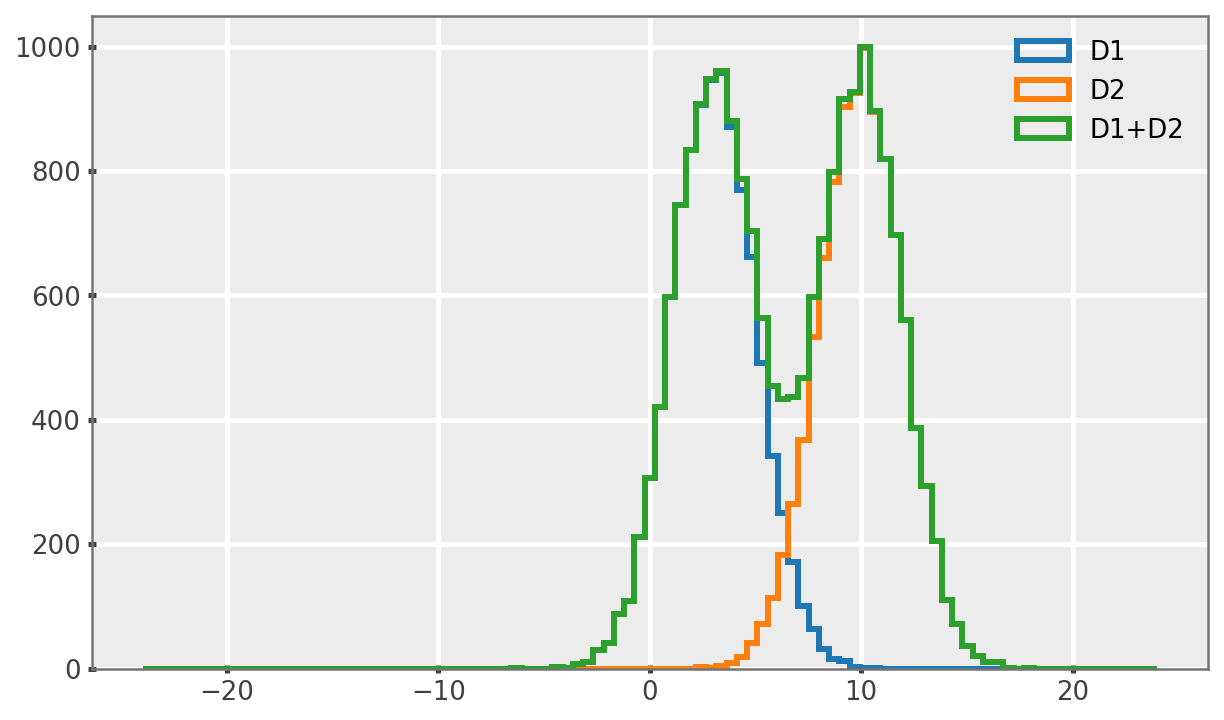

In [5]:
bins = np.linspace(-24,24, 100)
plt.hist(D1, bins=bins, histtype='step', lw=3, label='D1')
plt.hist(D2, bins=bins, histtype='step', lw=3, label='D2')

plt.hist(np.append(D1,D2), bins=bins, histtype='step', lw=3, label='D1+D2')
plt.legend()

(20000,)


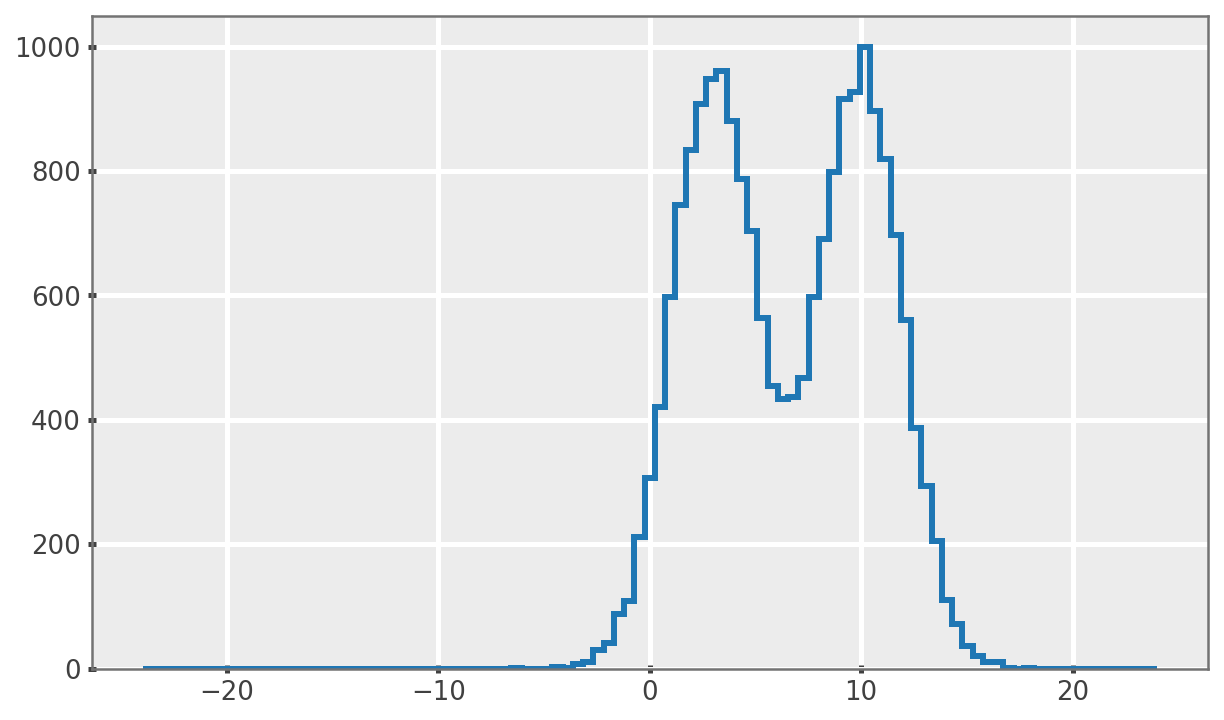

In [6]:
D = np.append(D1,D2)
print(D.shape)
plt.hist(D, bins=bins, histtype='step', lw=3, label='D1+D2');


In [7]:
with mc3.Model() as model:
    weights = mc3.Uniform('weights', 0,1 , shape=2)
    loc1_mc = mc3.Uniform('loc1_mc', -10,20)
    loc2_mc = mc3.Uniform('loc2_mc', loc1_mc,20)
    sds_mc = mc3.Uniform('sds_mc', 0, 10) # we know they are the same for round 1
    obs = mc3.NormalMixture('obs', w=weights, mu=[loc1_mc, loc2_mc], sd=sds_mc, observed=D, shape=2)
    start = mc3.find_MAP()
    trace = mc3.sample(20000, start=start, njobs=6)
    
mc3.traceplot(trace);
mc3.summary(trace)


logp = -inf, ||grad|| = 0.95999: 100%|██████████| 14/14 [00:00<00:00, 321.09it/s]  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [sds_mc_interval__, loc2_mc_interval__, loc1_mc_interval__, weights_interval__]
  0%|          | 0/20500 [00:00<?, ?it/s]


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x1040fdf60, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/balarsen/miniconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/balarsen/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/balar.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x1040fdf60, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/balarsen/miniconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/balarsen/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/balar.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Uni...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/asyncio/base_events.py in run_forever(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
    416             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    417                                    finalizer=self._asyncgen_finalizer_hook)
    418         try:
    419             events._set_running_loop(self)
    420             while True:
--> 421                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_UnixS...EventLoop running=True closed=False debug=False>>
    422                 if self._stopping:
    423                     break
    424         finally:
    425             self._stopping = False

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/asyncio/base_events.py in _run_once(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
   1426                         logger.warning('Executing %s took %.3f seconds',
   1427                                        _format_handle(handle), dt)
   1428                 finally:
   1429                     self._current_handle = None
   1430             else:
-> 1431                 handle._run()
        handle._run = <bound method Handle._run of <Handle IOLoop._run_callback(functools.par... 0x10ccd2730>))>>
   1432         handle = None  # Needed to break cycles when an exception occurs.
   1433 
   1434     def _set_coroutine_wrapper(self, enabled):
   1435         try:

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/asyncio/events.py in _run(self=<Handle IOLoop._run_callback(functools.par... 0x10ccd2730>))>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method IOLoop._run_callback of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (functools.partial(<function wrap.<locals>.null_wrapper at 0x10ccd2730>),)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/tornado/ioloop.py in _run_callback(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, callback=functools.partial(<function wrap.<locals>.null_wrapper at 0x10ccd2730>))
    754         """Runs a callback with error handling.
    755 
    756         For use in subclasses.
    757         """
    758         try:
--> 759             ret = callback()
        ret = undefined
        callback = functools.partial(<function wrap.<locals>.null_wrapper at 0x10ccd2730>)
    760             if ret is not None:
    761                 from tornado import gen
    762                 # Functions that return Futures typically swallow all
    763                 # exceptions and store them in the Future.  If a Future

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ()
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in <lambda>()
    531             return
    532 
    533         if state & self.socket.events:
    534             # events still exist that haven't been processed
    535             # explicitly schedule handling to avoid missing events due to edge-triggered FDs
--> 536             self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
    537 
    538     def _init_io_state(self):
    539         """initialize the ioloop event handler"""
    540         with stack_context.NullContext():

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=0)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'with mc3.Model() as model:\n    weights = mc3.Uni...6)\n    \nmc3.traceplot(trace);\nmc3.summary(trace)\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 5, 17, 20, 45, 58, 318337, tzinfo=tzutc()), 'msg_id': '3346857fbc484a29834d55b0f99f250a', 'msg_type': 'execute_request', 'session': 'b32d76c43fb041c28d8f737823156db4', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '3346857fbc484a29834d55b0f99f250a', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'b32d76c43fb041c28d8f737823156db4']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'with mc3.Model() as model:\n    weights = mc3.Uni...6)\n    \nmc3.traceplot(trace);\nmc3.summary(trace)\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 5, 17, 20, 45, 58, 318337, tzinfo=tzutc()), 'msg_id': '3346857fbc484a29834d55b0f99f250a', 'msg_type': 'execute_request', 'session': 'b32d76c43fb041c28d8f737823156db4', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '3346857fbc484a29834d55b0f99f250a', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'b32d76c43fb041c28d8f737823156db4'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'with mc3.Model() as model:\n    weights = mc3.Uni...6)\n    \nmc3.traceplot(trace);\nmc3.summary(trace)\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 5, 17, 20, 45, 58, 318337, tzinfo=tzutc()), 'msg_id': '3346857fbc484a29834d55b0f99f250a', 'msg_type': 'execute_request', 'session': 'b32d76c43fb041c28d8f737823156db4', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '3346857fbc484a29834d55b0f99f250a', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='with mc3.Model() as model:\n    weights = mc3.Uni...6)\n    \nmc3.traceplot(trace);\nmc3.summary(trace)\n', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'with mc3.Model() as model:\n    weights = mc3.Uni...6)\n    \nmc3.traceplot(trace);\nmc3.summary(trace)\n'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('with mc3.Model() as model:\n    weights = mc3.Uni...6)\n    \nmc3.traceplot(trace);\nmc3.summary(trace)\n',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('with mc3.Model() as model:\n    weights = mc3.Uni...6)\n    \nmc3.traceplot(trace);\nmc3.summary(trace)\n',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='with mc3.Model() as model:\n    weights = mc3.Uni...6)\n    \nmc3.traceplot(trace);\nmc3.summary(trace)\n', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'with mc3.Model() as model:\n    weights = mc3.Uni...6)\n    \nmc3.traceplot(trace);\nmc3.summary(trace)\n'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='with mc3.Model() as model:\n    weights = mc3.Uni...6)\n    \nmc3.traceplot(trace);\nmc3.summary(trace)\n', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.With object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-7-a397ffb9a308>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 10cccd978, execution_...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x10b603420, file "<ipython-input-7-a397ffb9a308>", line 1>
        result = <ExecutionResult object at 10cccd978, execution_...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x10b603420, file "<ipython-input-7-a397ffb9a308>", line 1>, result=<ExecutionResult object at 10cccd978, execution_...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x10b603420, file "<ipython-input-7-a397ffb9a308>", line 1>
        self.user_global_ns = {'D': array([ 5.40883593,  1.47015232,  1.27914266, ..., 10.15396832,
       12.14855756,  8.5821453 ]), 'D1': array([5.40883593, 1.47015232, 1.27914266, ..., 2.44130585, 2.68650527,
       2.39664147]), 'D2': array([12.16740917,  7.28889401,  9.47132243, ..., 10.15396832,
       12.14855756,  8.5821453 ]), 'In': ['', "get_ipython().run_line_magic('matplotlib', 'inli...python().run_line_magic('load_ext', 'autoreload')", "import datetime\nimport os\nimport sys\nimport warn...ersion_information', 'matplotlib, numpy, pandas')", 'plt.rcParams[\'figure.figsize\'] = [10, 6]\nplt.rcP...onfig\', "InlineBackend.figure_format = \'retina\'")', '# Lets make to Normal distributions and add them...2 = np.random.normal(locs[1], sds[1], size=10000)', "bins = np.linspace(-24,24, 100)\nplt.hist(D1, bin...isttype='step', lw=3, label='D1+D2')\nplt.legend()", "D = np.append(D1,D2)\nprint(D.shape)\nplt.hist(D, bins=bins, histtype='step', lw=3, label='D1+D2');", 'with mc3.Model() as model:\n    weights = mc3.Uni...=6)\n    \nmc3.traceplot(trace);\nmc3.summary(trace)'], 'Out': {2: <version_information.version_information.VersionInformation object>, 5: <matplotlib.legend.Legend object>}, '_': <matplotlib.legend.Legend object>, '_2': <version_information.version_information.VersionInformation object>, '_5': <matplotlib.legend.Legend object>, '__': <version_information.version_information.VersionInformation object>, '___': '', ...}
        self.user_ns = {'D': array([ 5.40883593,  1.47015232,  1.27914266, ..., 10.15396832,
       12.14855756,  8.5821453 ]), 'D1': array([5.40883593, 1.47015232, 1.27914266, ..., 2.44130585, 2.68650527,
       2.39664147]), 'D2': array([12.16740917,  7.28889401,  9.47132243, ..., 10.15396832,
       12.14855756,  8.5821453 ]), 'In': ['', "get_ipython().run_line_magic('matplotlib', 'inli...python().run_line_magic('load_ext', 'autoreload')", "import datetime\nimport os\nimport sys\nimport warn...ersion_information', 'matplotlib, numpy, pandas')", 'plt.rcParams[\'figure.figsize\'] = [10, 6]\nplt.rcP...onfig\', "InlineBackend.figure_format = \'retina\'")', '# Lets make to Normal distributions and add them...2 = np.random.normal(locs[1], sds[1], size=10000)', "bins = np.linspace(-24,24, 100)\nplt.hist(D1, bin...isttype='step', lw=3, label='D1+D2')\nplt.legend()", "D = np.append(D1,D2)\nprint(D.shape)\nplt.hist(D, bins=bins, histtype='step', lw=3, label='D1+D2');", 'with mc3.Model() as model:\n    weights = mc3.Uni...=6)\n    \nmc3.traceplot(trace);\nmc3.summary(trace)'], 'Out': {2: <version_information.version_information.VersionInformation object>, 5: <matplotlib.legend.Legend object>}, '_': <matplotlib.legend.Legend object>, '_2': <version_information.version_information.VersionInformation object>, '_5': <matplotlib.legend.Legend object>, '__': <version_information.version_information.VersionInformation object>, '___': '', ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
/Users/balarsen/svnhome/pymc_learning/Mixture/<ipython-input-7-a397ffb9a308> in <module>()
      3     loc1_mc = mc3.Uniform('loc1_mc', -10,20)
      4     loc2_mc = mc3.Uniform('loc2_mc', loc1_mc,20)
      5     sds_mc = mc3.Uniform('sds_mc', 0, 10) # we know they are the same for round 1
      6     obs = mc3.NormalMixture('obs', w=weights, mu=[loc1_mc, loc2_mc], sd=sds_mc, observed=D, shape=2)
      7     start = mc3.find_MAP()
----> 8     trace = mc3.sample(20000, start=start, njobs=6)
      9     
     10 mc3.traceplot(trace);
     11 mc3.summary(trace)

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/pymc3/sampling.py in sample(draws=20500, step=<pymc3.step_methods.hmc.nuts.NUTS object>, init='auto', n_init=200000, start=[{'loc1_mc': array(20.), 'loc1_mc_interval__': array(56.95719365), 'loc2_mc': array(20.), 'loc2_mc_interval__': array(-0.40594688), 'sds_mc': array(4.17872837), 'sds_mc_interval__': array(-0.33151175), 'weights': array([0.65522219, 0.59548216]), 'weights_interval__': array([0.6420742 , 0.38667557])}, {'loc1_mc': array(20.), 'loc1_mc_interval__': array(56.95719365), 'loc2_mc': array(20.), 'loc2_mc_interval__': array(-0.40594688), 'sds_mc': array(4.17872837), 'sds_mc_interval__': array(-0.33151175), 'weights': array([0.65522219, 0.59548216]), 'weights_interval__': array([0.6420742 , 0.38667557])}, {'loc1_mc': array(20.), 'loc1_mc_interval__': array(56.95719365), 'loc2_mc': array(20.), 'loc2_mc_interval__': array(-0.40594688), 'sds_mc': array(4.17872837), 'sds_mc_interval__': array(-0.33151175), 'weights': array([0.65522219, 0.59548216]), 'weights_interval__': array([0.6420742 , 0.38667557])}, {'loc1_mc': array(20.), 'loc1_mc_interval__': array(56.95719365), 'loc2_mc': array(20.), 'loc2_mc_interval__': array(-0.40594688), 'sds_mc': array(4.17872837), 'sds_mc_interval__': array(-0.33151175), 'weights': array([0.65522219, 0.59548216]), 'weights_interval__': array([0.6420742 , 0.38667557])}, {'loc1_mc': array(20.), 'loc1_mc_interval__': array(56.95719365), 'loc2_mc': array(20.), 'loc2_mc_interval__': array(-0.40594688), 'sds_mc': array(4.17872837), 'sds_mc_interval__': array(-0.33151175), 'weights': array([0.65522219, 0.59548216]), 'weights_interval__': array([0.6420742 , 0.38667557])}, {'loc1_mc': array(20.), 'loc1_mc_interval__': array(56.95719365), 'loc2_mc': array(20.), 'loc2_mc_interval__': array(-0.40594688), 'sds_mc': array(4.17872837), 'sds_mc_interval__': array(-0.33151175), 'weights': array([0.65522219, 0.59548216]), 'weights_interval__': array([0.6420742 , 0.38667557])}], trace=None, chain_idx=0, chains=6, cores=6, tune=500, nuts_kwargs=None, step_kwargs=None, progressbar=True, model=<pymc3.model.Model object>, random_seed=[888706201, 932597658, 247999362, 394145644, 146160377, 203455957], live_plot=False, discard_tuned_samples=True, live_plot_kwargs=None, compute_convergence_checks=True, use_mmap=False, **kwargs={'njobs': 6})
    437     parallel = cores > 1 and chains > 1 and not has_population_samplers
    438     if parallel:
    439         _log.info('Multiprocess sampling ({} chains in {} jobs)'.format(chains, cores))
    440         _print_step_hierarchy(step)
    441         try:
--> 442             trace = _mp_sample(**sample_args)
        trace = None
        sample_args = {'chain': 0, 'chains': 6, 'cores': 6, 'draws': 20500, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'njobs': 6, 'progressbar': True, 'random_seed': [888706201, 932597658, 247999362, 394145644, 146160377, 203455957], ...}
    443         except pickle.PickleError:
    444             _log.warning("Could not pickle model, sampling singlethreaded.")
    445             _log.debug('Pickling error:', exec_info=True)
    446             parallel = False

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/pymc3/sampling.py in _mp_sample(**kwargs={'draws': 20500, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'njobs': 6, 'step': <pymc3.step_methods.hmc.nuts.NUTS object>, 'trace': None, 'tune': 500})
    977             for args in zip(chain_nums, pbars, rseed, start))
    978 
    979     if use_mmap:
    980         traces = Parallel(n_jobs=cores)(jobs)
    981     else:
--> 982         traces = Parallel(n_jobs=cores, mmap_mode=None)(jobs)
        traces = undefined
        cores = 6
        jobs = <generator object _mp_sample.<locals>.<genexpr>>
    983 
    984     return MultiTrace(traces)
    985 
    986 

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/joblib/parallel.py in __call__(self=Parallel(n_jobs=6), iterable=<generator object _mp_sample.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=6)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Thu May 17 14:49:00 2018
PID: 10709              Python 3.6.4: /Users/balarsen/miniconda3/bin/python
...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/joblib/parallel.py in __call__(self=<joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _sample>, (0, True, 888706201, {'loc1_mc': array(20.), 'loc1_mc_interval__': array(56.95719365), 'loc2_mc': array(20.), 'loc2_mc_interval__': array(-0.40594688), 'sds_mc': array(4.17872837), 'sds_mc_interval__': array(-0.33151175), 'weights': array([0.65522219, 0.59548216]), 'weights_interval__': array([0.6420742 , 0.38667557])}), {'draws': 20500, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'njobs': 6, 'step': <pymc3.step_methods.hmc.nuts.NUTS object>, 'trace': None, 'tune': 500})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _sample>
        args = (0, True, 888706201, {'loc1_mc': array(20.), 'loc1_mc_interval__': array(56.95719365), 'loc2_mc': array(20.), 'loc2_mc_interval__': array(-0.40594688), 'sds_mc': array(4.17872837), 'sds_mc_interval__': array(-0.33151175), 'weights': array([0.65522219, 0.59548216]), 'weights_interval__': array([0.6420742 , 0.38667557])})
        kwargs = {'draws': 20500, 'live_plot': False, 'live_plot_kwargs': None, 'model': <pymc3.model.Model object>, 'njobs': 6, 'step': <pymc3.step_methods.hmc.nuts.NUTS object>, 'trace': None, 'tune': 500}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/pymc3/sampling.py in _sample(chain=0, progressbar=True, random_seed=888706201, start={'loc1_mc': array(20.), 'loc1_mc_interval__': array(56.95719365), 'loc2_mc': array(20.), 'loc2_mc_interval__': array(-0.40594688), 'sds_mc': array(4.17872837), 'sds_mc_interval__': array(-0.33151175), 'weights': array([0.65522219, 0.59548216]), 'weights_interval__': array([0.6420742 , 0.38667557])}, draws=20500, step=<pymc3.step_methods.hmc.nuts.NUTS object>, trace=None, tune=500, model=<pymc3.model.Model object>, live_plot=False, live_plot_kwargs=None, **kwargs={'njobs': 6})
    549                             tune, model, random_seed)
    550     if progressbar:
    551         sampling = tqdm(sampling, total=draws)
    552     try:
    553         strace = None
--> 554         for it, strace in enumerate(sampling):
        it = undefined
        strace = None
        sampling =   0%|          | 0/20500 [00:01<?, ?it/s]
    555             if live_plot:
    556                 if live_plot_kwargs is None:
    557                     live_plot_kwargs = {}
    558                 if it >= skip_first:

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/tqdm/_tqdm.py in __iter__(self=  0%|          | 0/20500 [00:01<?, ?it/s])
    922             except AttributeError:
    923                 raise TqdmDeprecationWarning("""\
    924 Please use `tqdm_gui(...)` instead of `tqdm(..., gui=True)`
    925 """, fp_write=getattr(self.fp, 'write', sys.stderr.write))
    926 
--> 927             for obj in iterable:
        obj = undefined
        iterable = <generator object _iter_sample>
    928                 yield obj
    929                 # Update and possibly print the progressbar.
    930                 # Note: does not call self.update(1) for speed optimisation.
    931                 n += 1

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/pymc3/sampling.py in _iter_sample(draws=20500, step=<pymc3.step_methods.hmc.nuts.NUTS object>, start={'loc1_mc': array(20.), 'loc1_mc_interval__': array(56.95719365), 'loc2_mc': array(20.), 'loc2_mc_interval__': array(-0.40594688), 'sds_mc': array(4.17872837), 'sds_mc_interval__': array(-0.33151175), 'weights': array([0.65522219, 0.59548216]), 'weights_interval__': array([0.6420742 , 0.38667557])}, trace=None, chain=0, tune=500, model=<pymc3.model.Model object>, random_seed=888706201)
    647         step.tune = bool(tune)
    648         for i in range(draws):
    649             if i == tune:
    650                 step = stop_tuning(step)
    651             if step.generates_stats:
--> 652                 point, states = step.step(point)
        point = {'loc1_mc_interval__': array(56.95719365), 'loc2_mc_interval__': array(-0.40594688), 'sds_mc_interval__': array(-0.33151175), 'weights_interval__': array([0.6420742 , 0.38667557])}
        states = undefined
        step.step = <bound method GradientSharedStep.step of <pymc3.step_methods.hmc.nuts.NUTS object>>
    653                 if strace.supports_sampler_stats:
    654                     strace.record(point, states)
    655                 else:
    656                     strace.record(point)

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/pymc3/step_methods/arraystep.py in step(self=<pymc3.step_methods.hmc.nuts.NUTS object>, point={'loc1_mc_interval__': array(56.95719365), 'loc2_mc_interval__': array(-0.40594688), 'sds_mc_interval__': array(-0.33151175), 'weights_interval__': array([0.6420742 , 0.38667557])})
    217     def step(self, point):
    218         self._logp_dlogp_func.set_extra_values(point)
    219         array = self._logp_dlogp_func.dict_to_array(point)
    220 
    221         if self.generates_stats:
--> 222             apoint, stats = self.astep(array)
        apoint = undefined
        stats = undefined
        self.astep = <bound method BaseHMC.astep of <pymc3.step_methods.hmc.nuts.NUTS object>>
        array = array([-0.33151175, -0.40594688, 56.95719365,  0.6420742 ,  0.38667557])
    223             point = self._logp_dlogp_func.array_to_full_dict(apoint)
    224             return point, stats
    225         else:
    226             apoint = self.astep(array)

...........................................................................
/Users/balarsen/miniconda3/lib/python3.6/site-packages/pymc3/step_methods/hmc/base_hmc.py in astep(self=<pymc3.step_methods.hmc.nuts.NUTS object>, q0=array([-0.33151175, -0.40594688, 56.95719365,  0.6420742 ,  0.38667557]))
    112         start = self.integrator.compute_state(q0, p0)
    113 
    114         if not np.isfinite(start.energy):
    115             self.potential.raise_ok()
    116             raise ValueError('Bad initial energy: %s. The model '
--> 117                              'might be misspecified.' % start.energy)
        start.energy = nan
    118 
    119         adapt_step = self.tune and self.adapt_step_size
    120         step_size = self.step_adapt.current(adapt_step)
    121         self.step_size = step_size

ValueError: Bad initial energy: nan. The model might be misspecified.
___________________________________________________________________________

In [ ]:
ppc = mc3.sample_ppc(trace, model=model, samples=500)
ppc.keys()

In [ ]:
plt.hist(ppc['obs'], bins=bins)